# KNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import seaborn as sns

In [3]:
#Import dataframe from JSON file
jsonStr = "parameters_df.json"
imported_df = pd.read_json(jsonStr, orient ='index')
print(imported_df.head)

<bound method NDFrame.head of                                                    red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.7112  2.8076   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.7464  2.0908   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.6620  2.2704   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.8940  2.2452   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  3.0032  2.5404   
...                                                ...     ...     ...   
data/13666/1/13666_idx5_x901_y1101_class1.png   2.1980  2.3572  2.7020   
data/13666/1/13666_idx5_x1051_y1001_class1.png  2.6968  2.4552  2.5280   
data/13666/1/13666_idx5_x1051_y1151_class1.png  2.4272  2.8244  2.5152   
data/13666/1/13666_idx5_x1051_y1051_class1.png  2.5724  2.3860  2.5444   
data/13666/1/13666_idx5_x901_y1151_class1.png   2.7212  2.7648  3.0000   

                                                    gray  gray_var  edges  \
data

# Creating KNN classifier

In [26]:
#KNN algorithm
# Create feature and target arrays
X = imported_df[['red','blue','green','gray','gray_var','edges','ridges']] #Features
y = imported_df['group'] #Class of the pictures

# Split into training, test and validation set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False) #Train 80% Test 20%
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.125, shuffle=False) #Split train: 70% and 80%*0.125=10% validation

#Defining empty arrays and parameters
step_size = 50
acc_for_ks = []
mse = []
conf_mat = []
conf_mat2 = []

#Scaling data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val) 
X_test_scaled = scaler.transform(X_test)

#Knn classifier tuning
for k in range(1,400,step_size):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', leaf_size=30, metric='minkowski') #Tunable hyper parameters
    knn.fit(X_train_scaled, y_train) #train model
    
    
    pred = knn.predict(X_val_scaled) #make prediction with validation set
    pred2 = knn.predict(X_test_scaled) #make prediction with test set

    #conf_mat.append(confusion_matrix(X_val_scaled, pred)) #Put true values and predictions with validation set in confusion matrix
    #conf_mat2.append(confusion_matrix(X_test_scaled, pred2)) #Put true values and predictions with test setin confusion matrix

    match = 0
    UnMatch = 0
    
    #Counting correctly classified elements
    for i in range(len(pred)):
        if pred[i] == y_val[i]:
            match += 1
        else:
            UnMatch += 1

    accuracy = match/len(pred) #Calculating accuracy
    acc_for_ks.append(accuracy) #Putting ccuracies in array
    mse.append(mean_squared_error(y_val, pred)) #Putting mean square errors in array
    print(f'The accuracy for K={k} is {accuracy}')


#Print stats
print('Mean square error: ', min(mse))
print('Accuracy score (validation): ', max(acc_for_ks)*100, '%')
print('Optimal K value is: ', np.argmax(acc_for_ks)*step_size+1)


The accuracy for K=1 is 0.7275970165387525
The accuracy for K=51 is 0.7986523979389616
The accuracy for K=101 is 0.7999855871437322
The accuracy for K=151 is 0.801030519223147
The accuracy for K=201 is 0.8013908406298418
The accuracy for K=251 is 0.8005621013944438
The accuracy for K=301 is 0.800417972831766
The accuracy for K=351 is 0.8000576514250711
Mean square error:  0.1986091593701582
Accuracy score:  80.13908406298418 %
Optimal K value is:  201


# Plot of performance for KNN classifier

Accuracy (test):  0.7968110980992703
Balanced accuracy (test):  0.7248468280425923


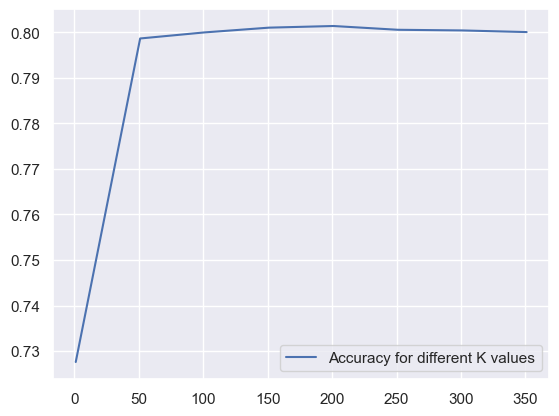

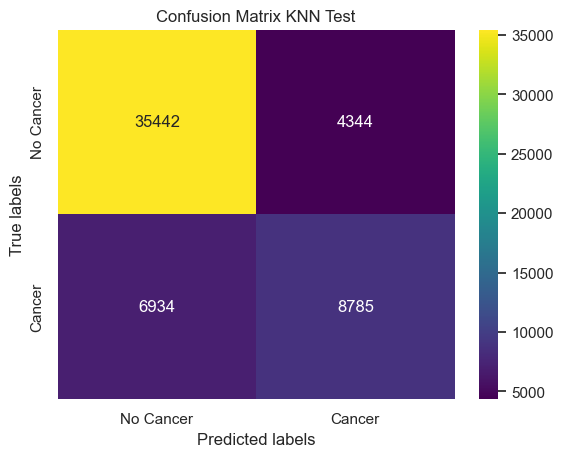

In [29]:
#Knn plots
print('Accuracy (test): ', accuracy_score(y_test,pred2))
print('Balanced accuracy (test): ', balanced_accuracy_score(y_test,pred2))

#Plot for tuning K 
plt.plot(range(1,400,step_size), acc_for_ks)
plt.legend(['Accuracy for different K values'], loc ="lower right")
plt.show()

#Plot confusion matrix
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(confusion_matrix(y_test,pred2), annot=True, ax=ax, cmap="viridis", fmt="g");
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix KNN Test');
ax.xaxis.set_ticklabels(['No Cancer', 'Cancer']);
ax.yaxis.set_ticklabels(['No Cancer', 'Cancer']);
plt.show()

